# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Lineal: Lección 10 - Métricas**
---

- En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:


- Calculéis las métricas para vuestro modelo
  
- Discutid los resultados de las métricas y extraed conclusiones
  
- Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [1]:
# Tratamiento de los datos
# ========================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

#  Modelado y evaluación
# =======================
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

In [2]:
df = pd.read_csv("datos/soci_econ_country_profiles_encoding.csv", index_col = 0)
df.head(2)

,region,restaurant_price_index,population_2017,employment_agriculture,employment_industry,employment_services,education,quality_of_life_index,purchasing_power_index,safety_index,cost_of_living,consumer_price_index,human_capital_index,inflation,urban_population,population_age_distribution_0_14,population_age_distribution_60_plus,international_migrant_stock,restaurant_price_index_normal,region_map
country,,,,,,,,,,,,,,,,,,,,
Argentina,SouthAmerica,50.37,0.432582,-0.331263,0.131944,0.315638,0.258824,-0.022740,-0.243315,-1.258757,0.080347,-0.036551,-0.572700,0.374915,0.605509,0.927114,-0.437736,-0.307692,4.246653,4.043640
Australia,Oceania,77.12,0.095085,-0.273292,-0.368056,0.487805,0.211765,0.550795,0.660990,-0.139554,0.893666,0.102195,0.566766,-0.030665,0.393466,0.239067,-0.015094,1.538462,4.749998,4.752619


### 1. Con todas las variables predictoras

In [3]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X = df.drop(["restaurant_price_index_normal", 'region', 'restaurant_price_index'], axis = 1)
y = df["restaurant_price_index_normal"]

In [4]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# iniciamos la regresión lineal
lr = LinearRegression(n_jobs=-1)
# fiteamos el modelo
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [6]:
# usamos el método predict() para hacer las predicciones
y_predict_train = lr.predict(x_train) # predicciones para los datos de entrenamiento
y_predict_test = lr.predict(x_test) # predicciones para los datos de test

In [7]:
# creamos un dataframe para comparar los datos reales y los predichos de cada conjunto (train y test)
df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
# unimos todo en un dataframe
df_resultados = pd.concat([df_train, df_test], axis = 0)
df_resultados.head()

,Real,Predicted,Set
country,,,
Malaysia,3.232599,3.401407,Train
Indonesia,3.200753,3.320231,Train
Belarus,3.906126,3.563881,Train
Egypt,3.100294,2.970003,Train
Philippines,3.176574,3.140247,Train


In [8]:
# creamos una columna con los errores/residuos
df_resultados['residuos'] = df_resultados['Real'] - df_resultados['Predicted']
df_resultados.head()

,Real,Predicted,Set,residuos
country,,,,
Malaysia,3.232599,3.401407,Train,-0.168808
Indonesia,3.200753,3.320231,Train,-0.119478
Belarus,3.906126,3.563881,Train,0.342245
Egypt,3.100294,2.970003,Train,0.130290
Philippines,3.176574,3.140247,Train,0.036327


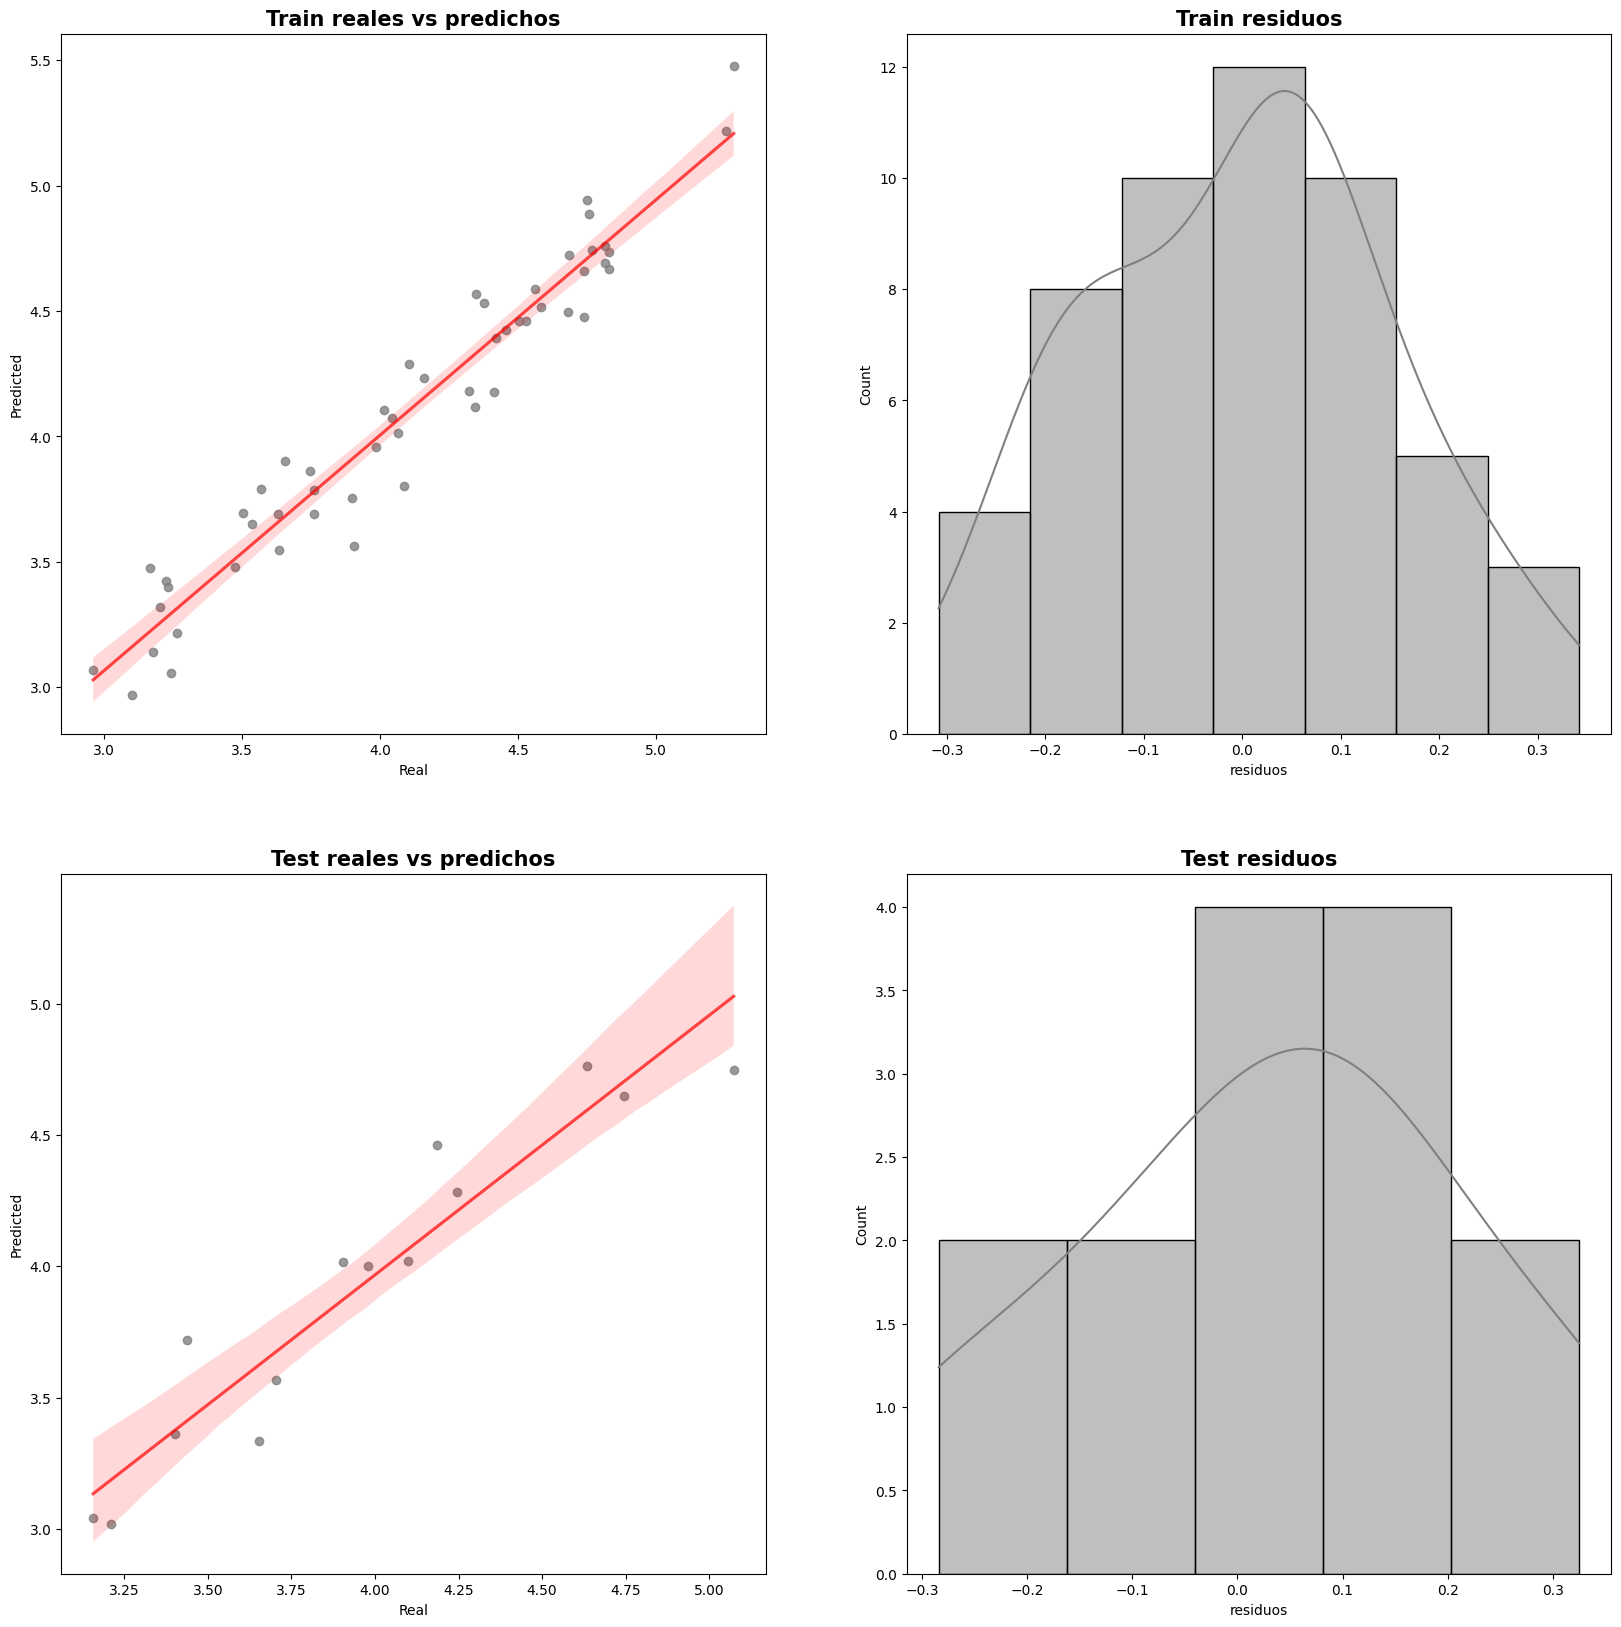

In [9]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# ploteamos los reales vs los predichos
sns.regplot(data = df_resultados[df_resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted",  
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 },
            ax = ax[0,0])

sns.regplot(data = df_resultados[df_resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

# ploteamos los residuos
sns.histplot(df_resultados[df_resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])

sns.histplot(df_resultados[df_resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [10]:
# obtenemos las métricas con una función
df_metricas = spf.metricas_rlin(y_test, y_predict_test, y_train, y_predict_train, 'Regresion Lineal-todas VP')
df_metricas

,MAE,MSE,RMSE,R2,set,modelo
0,0.154444,0.034332,0.185289,0.891354,test,Regresion Lineal-todas VP
1,0.124807,0.022621,0.150403,0.938699,train,Regresion Lineal-todas VP


Conclusiones:

- En general, las métricas son buenas, ya que R2 es alto (entre un 89% y un 94% de la VR se explica por nuestras VPs).
  
- Los datos sugieren que nuestro modelo de ML se ajusta correctamente a los datos reales, ya que aunque el R2 de train sea más alto que el R2 de test, la diferenia es despreciable. Además, los valores de MAE, MSE y RMSE de train son ligeramente más bajos de los de test, es decir, no tanto como para considerar que el modelo esté sobreajustado. 

### 2. Solo con las variables predictoras que según el ANOVA afectan a la variable respuesta 

In [11]:
# separamos la variable respuesta y las predictoras que usaremos para el modelo
X_anova = df.filter(spv.col_anova)
y_anova = df["restaurant_price_index_normal"]

In [12]:
# dividimos los datos en los conjuntos de entrenamiento (train) y de test.
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(X_anova, y_anova, test_size = 0.2, random_state = 5)

In [13]:
# iniciamos la regresión lineal
lr_a = LinearRegression(n_jobs=-1)
# fiteamos el modelo
lr_a.fit(x_train_a, y_train_a)

LinearRegression(n_jobs=-1)

In [14]:
# usamos el método predict() para hacer las predicciones
y_predict_train_a = lr_a.predict(x_train_a) # predicciones para los datos de entrenamiento
y_predict_test_a = lr_a.predict(x_test_a) # predicciones para los datos de test

In [15]:
# creamos un dataframe para comparar los datos reales y los predichos de cada conjunto (train y test)
df_train_a = pd.DataFrame({'Real': y_train_a, 'Predicted': y_predict_train_a, 'Set': ['Train']*len(y_train_a)})
df_test_a = pd.DataFrame({'Real': y_test_a,  'Predicted': y_predict_test_a,  'Set': ['Test']*len(y_test_a)})
# unimos todo en un dataframe
df_resultados_a = pd.concat([df_train_a,df_test_a], axis = 0)
df_resultados_a.head()

,Real,Predicted,Set
country,,,
Jordan,4.375033,4.337588,Train
Saudi Arabia,3.654267,4.077423,Train
Sri Lanka,3.156519,3.109594,Train
Indonesia,3.200753,3.406132,Train
Sweden,4.767644,4.722743,Train


In [16]:
# creamos una columna con los errores/residuos
df_resultados_a['residuos'] = df_resultados_a['Real'] - df_resultados_a['Predicted']
df_resultados_a.head()

,Real,Predicted,Set,residuos
country,,,,
Jordan,4.375033,4.337588,Train,0.037445
Saudi Arabia,3.654267,4.077423,Train,-0.423156
Sri Lanka,3.156519,3.109594,Train,0.046925
Indonesia,3.200753,3.406132,Train,-0.205379
Sweden,4.767644,4.722743,Train,0.044901


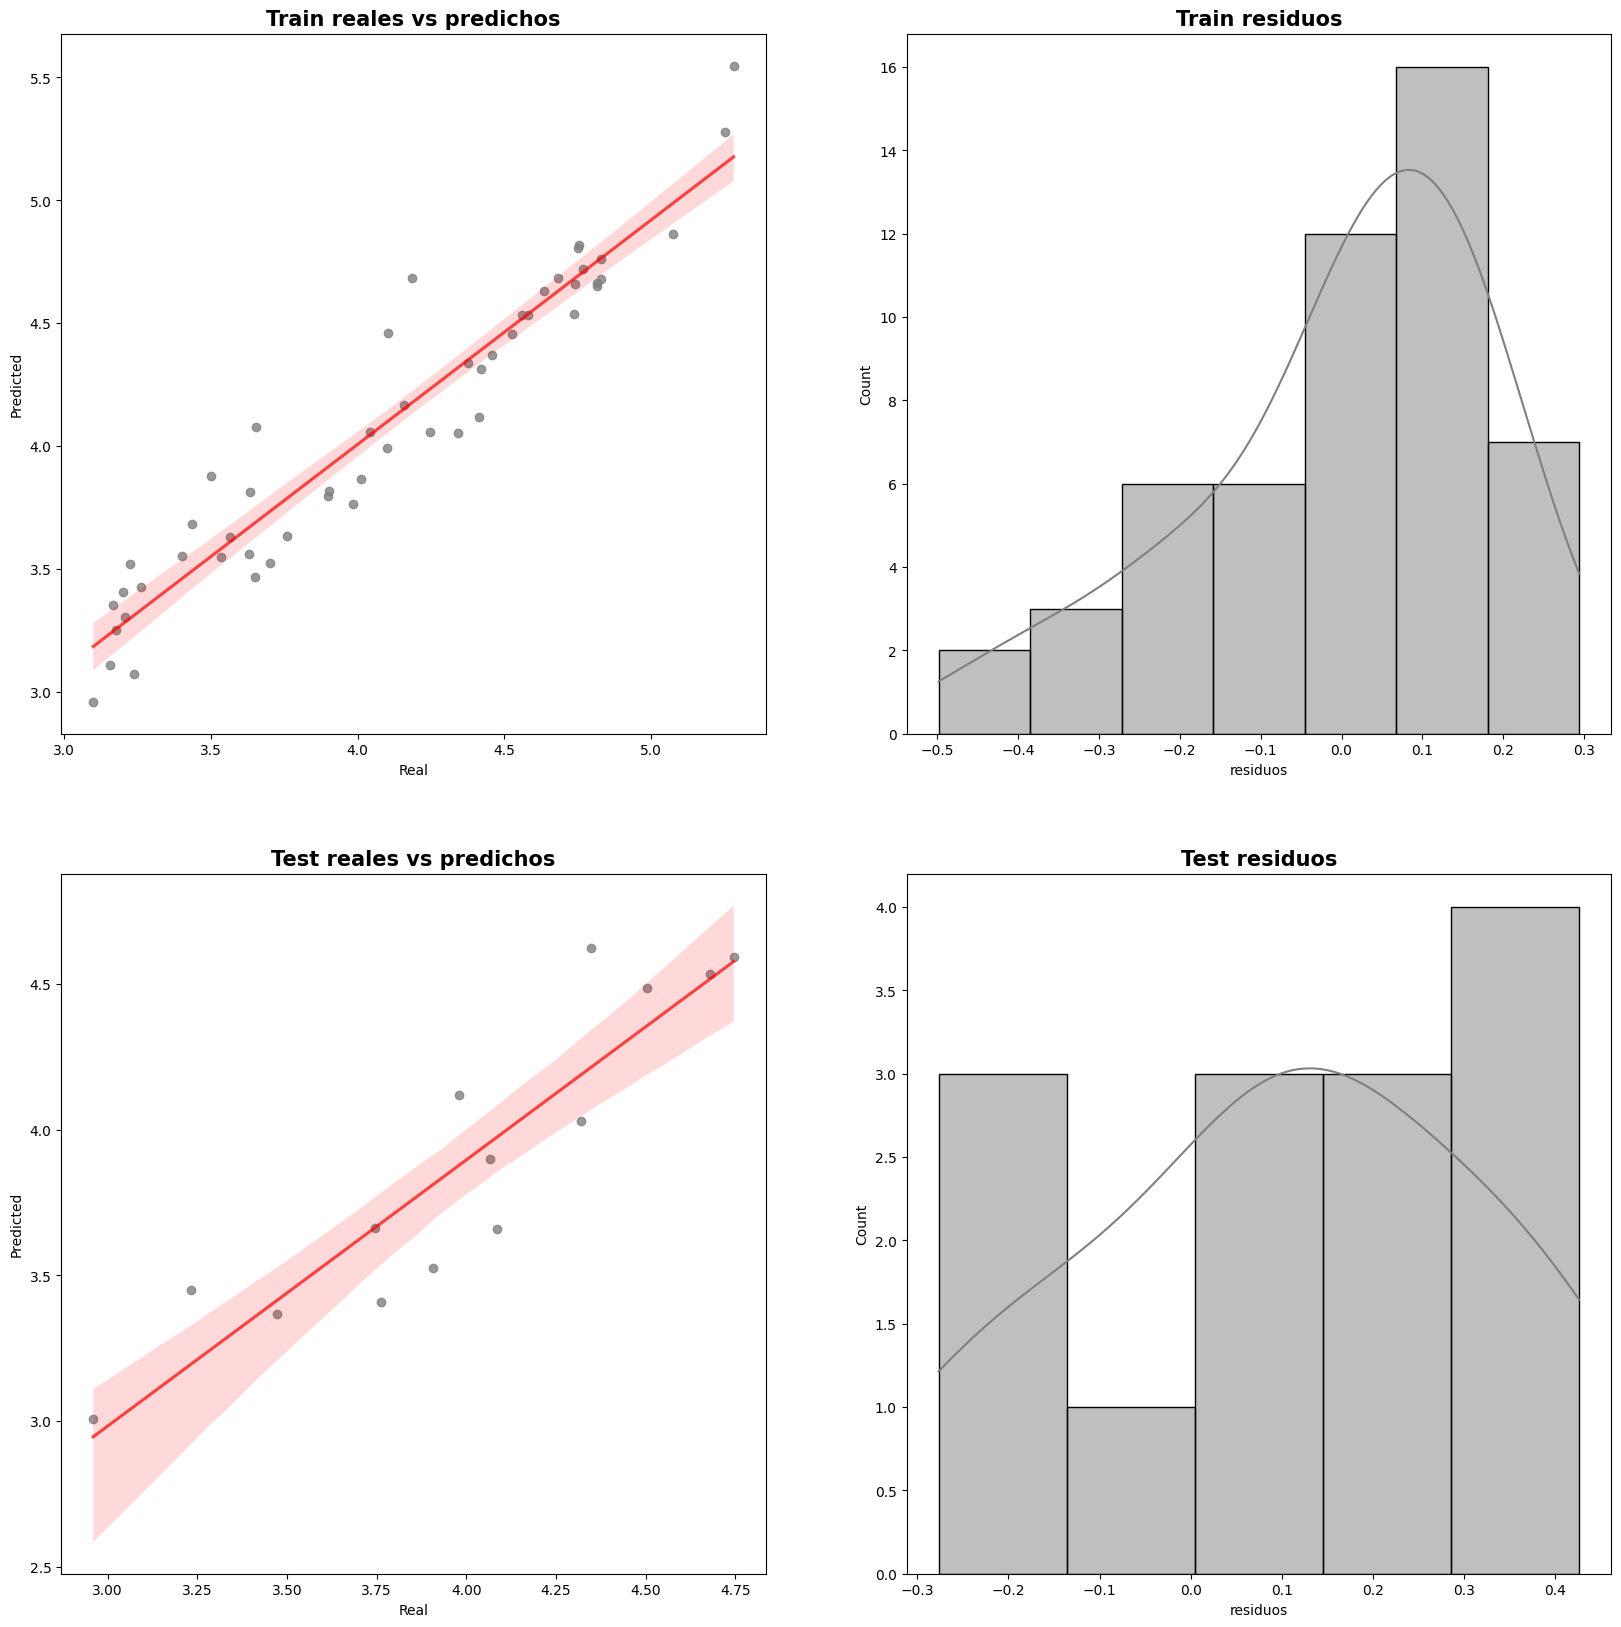

In [17]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# ploteamos los reales vs los predichos
sns.regplot(data = df_resultados_a[df_resultados_a['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 },
            ax = ax[0,0])

sns.regplot(data = df_resultados_a[df_resultados_a['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])

# ploteamos los residuos
sns.histplot(df_resultados_a[df_resultados_a['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])

sns.histplot(df_resultados_a[df_resultados_a['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [18]:
# obtenemos las métricas con una función
df_metricas_a = spf.metricas_rlin(y_test_a, y_predict_test_a, y_train_a, y_predict_train_a, 'Regresion Lineal-ANOVA')
df_metricas_a

,MAE,MSE,RMSE,R2,set,modelo
0,0.200268,0.055097,0.234727,0.784694,test,Regresion Lineal-ANOVA
1,0.145094,0.033317,0.182529,0.913887,train,Regresion Lineal-ANOVA


Conclusiones:

- En este caso, aunque los valores de MAE, MSE y RMSE podrían ser aceptables y sus diferencias entre train y test tambien, la diferencia entre el R2 de train y test es superior a 0,1, siendo más alto el valor de train, por lo que se estima que tenemos overfitting. Es decir, el modelo se ha aprendido los datos y por eso falla bastante más en el test que el train, porque en cuanto los datos se alejan un poco de lo que se ha aprendido empieza a no saber predecir.

In [19]:
# concatenamos las métricas de ambos modelos
df_metricas_todas = pd.concat([df_metricas, df_metricas_a], axis=0)
df_metricas_todas

,MAE,MSE,RMSE,R2,set,modelo
0,0.154444,0.034332,0.185289,0.891354,test,Regresion Lineal-todas VP
1,0.124807,0.022621,0.150403,0.938699,train,Regresion Lineal-todas VP
0,0.200268,0.055097,0.234727,0.784694,test,Regresion Lineal-ANOVA
1,0.145094,0.033317,0.182529,0.913887,train,Regresion Lineal-ANOVA


Comparando ambos modelos claramente es mucho mejor el primero `Regresion Lineal-todas VP`, el cual tiene en general buenas métricas, ya que R2 es alto (un 89% en el test), por lo que el 89% de la VR se explica por nuestras VPs. 
  
Los datos sugieren que este modelo se ajusta correctamente a los datos reales. Aunque el R2 de train sea más alto que el R2 de test, la diferenia es despreciable. Además, los valores de MAE, MSE y RMSE de train son ligeramente más bajos de los de test, es decir, no tanto como para considerar que el modelo esté sobreajustado. 

In [20]:
# Guardamos este csv para usarlo comparar con los siguientes modelos
df_metricas_todas.to_csv("datos/soci_econ_country_profiles_metricas_RL.csv")